We begin with exploring data modalities. These are, like, the way data occurs. Like time series data where our interest has a stamp of time to it, or images which are more like layered pixelations forming a cuboidal matrix data type
Or tabilar data which you can easily obtain from a time series data modality except not all tabular data is time series. Basically, tabular data and time series data retrieval is almost always the same since both of them would be stored in a csv format. 
The big difference comes in with images.

We will explore how to extract and treat all these kinds of data modalities

In [2]:
#Since our data is stored in a csv file, we load and manipulate it using pandas library

import pandas as pd

Then we download the data and save it to the appropriate folder. In this case, data is a subfolder within the folder that we are working on. This will allow us to see how we manipulate pathways to our advantage

In [3]:
#Now that we have the data downloaded, we can load it
df = pd.read_csv("Data/GBPUSD=X.csv") #r.read_csv is a method inside the pandas class/library that we call to load csv files. It takes the arguments of the path file on the local computer
df #This is to just call the dataframe variable that we created. This, now, is tabular data
#261 row by 7 columns

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-17,1.367353,1.368899,1.363866,1.367353,1.367353,0
1,2022-01-18,1.364800,1.366120,1.357626,1.364800,1.364800,0
2,2022-01-19,1.360082,1.364815,1.358936,1.360026,1.360026,0
3,2022-01-20,1.360952,1.366158,1.360156,1.360859,1.360859,0
4,2022-01-21,1.360026,1.360359,1.354757,1.359767,1.359767,0
...,...,...,...,...,...,...,...
256,2023-01-10,1.218472,1.219810,1.211255,1.218487,1.218487,0
257,2023-01-11,1.215451,1.217789,1.210185,1.215451,1.215451,0
258,2023-01-12,1.216012,1.223736,1.209716,1.215953,1.215953,0
259,2023-01-13,1.221643,1.224695,1.215185,1.221777,1.221777,0


How can we further manipulate such data? Say we want to plot a specific column against another specific column. How do you extract and plot?

For extracting, we can still use the pandas methods. Like now we are dealing with how to manipulate or access items within a dataframe

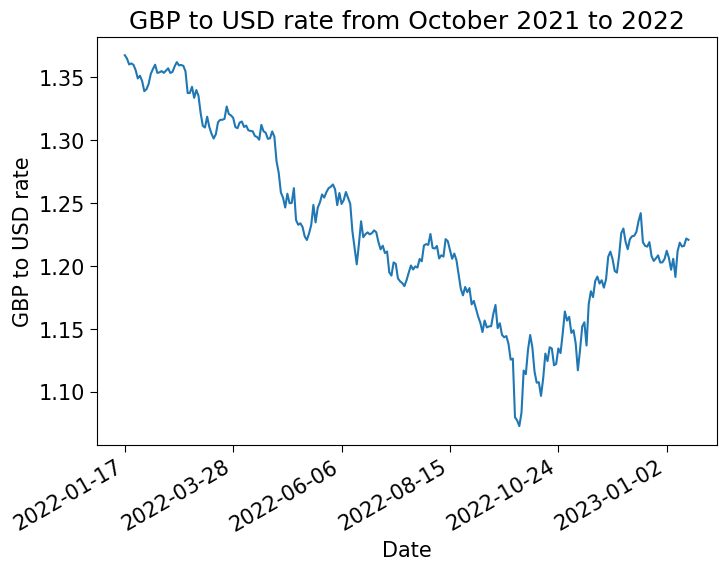

In [54]:
#for plotting, we need matplotlib. I first need to pip install it because I dont think I have it. I actually already had it

import matplotlib.pyplot as plt #matplotlib is the library, pyplot is the specific folder wihtin which we have tools to plot

#Apparently, this updates some parameters. Would be nice to try it
plt.rcParams.update(
    {
        "lines.markersize":10, #Big font?
        "font.size": 15,
        "xtick.major.size": 5.0,
        "ytick.major.size": 5.0
    }
)

#Now that parameters have been set, we plot
fig, ax = plt.subplots(figsize = [8,6]) #this method inside pyplot method returns two things - the figure and the axis. We can now play around with the axis eg ratio which also helps us adjust the shape of the figure itself. Note that we also specified the aspect ration with the figsize to ensure the graph comes out proper
ax.plot(df["Date"], df["Close"]) #this is what we are plotting on the x and y axis respctively. Note how we extracted the rows and columns from the tabular data and right into time series. Note that the data was in tabular format with 261 rows and 7 columns each with a name already assigned to it. Good question would be what if we want to rename it instead of just using it directly?
ax.set_xlabel("Date")
ax.set_ylabel("GBP to USD rate")
ax.set_title("GBP to USD rate from October 2021 to 2022")

#When run, the plot works but there is too many dates. Now, we can manually fix this by choosing our own timestamps (there are plt methods for that) or we can use an automatic fitter
fig.autofmt_xdate()

#So we go the old school way but slightly different
dates = df["Date"].to_numpy() #We are extracting the dates column from the dataframe and converting it to a numpy array then saving it as the variable dates for further manipulation
ax.set_xticks([dates[i] for i in range(0,len(dates),50)]) # Here, I have taken the array and said give me a tick for every steps of 50 days/steps for the entire array range. The reason for converting to an array with numpy is so that we can use that method on it as it is not available in dataframes


#And now it is cleaner


Once converted to a numpy array, we can apply all the numpy methods on it now. Example, let us extract the column containing High then compute its mean. The mean functionality is contained in the numpy library hence the need to import it

In [16]:
import numpy as np
High_array = df["High"].to_numpy()
High_mean = np.mean(High_array) #note that .mean is another method available within the numpy array. Worth looking into what other methods are there
print(f"The mean for the high array is {High_mean:3f}") # Remember to add the printf if you want to use this curly functionality. Worth looking into later on while playing around

The mean for the high array is 1.236943


Extra manipulation of the dataframe. Suppose we want to set up a filter on the data. In a sense, we are still within the tabular data model. What we extracted in the previous exercise was first time series (for the plot) then array (low level table) format

Now we are going back to manipulate the tabular dataframe further

First, setting up a filter that defines a threshold

In [17]:
valid = df["Open"]>1.3 #What I am creating is a shorter version of the colum Open where all the datapoints are above 1.3
print(valid)
#When run, this actually returns a boolean of True and False. So, still 261 rows but now boolean of True and False

0       True
1       True
2       True
3       True
4       True
       ...  
256    False
257    False
258    False
259    False
260    False
Name: Open, Length: 261, dtype: bool


In [19]:
#Actually, I just realised what we did. We just added a new column of boolean values to the dataframe.
#No. To do that, we have to say df[new_dataframe_column_name] = our array. Lets try it
df["Above 1.3"] = valid
df

,Date,Open,High,Low,Close,Adj Close,Volume,Above 1.3
0,2022-01-17,1.367353,1.368899,1.363866,1.367353,1.367353,0,True
1,2022-01-18,1.364800,1.366120,1.357626,1.364800,1.364800,0,True
2,2022-01-19,1.360082,1.364815,1.358936,1.360026,1.360026,0,True
3,2022-01-20,1.360952,1.366158,1.360156,1.360859,1.360859,0,True
4,2022-01-21,1.360026,1.360359,1.354757,1.359767,1.359767,0,True
...,...,...,...,...,...,...,...,...
256,2023-01-10,1.218472,1.219810,1.211255,1.218487,1.218487,0,False
257,2023-01-11,1.215451,1.217789,1.210185,1.215451,1.215451,0,False
258,2023-01-12,1.216012,1.223736,1.209716,1.215953,1.215953,0,False
259,2023-01-13,1.221643,1.224695,1.215185,1.221777,1.221777,0,False


Now to apply the filter. We could decide to filter only a specific column or create an entirely new dataframe based off of that filter that we applied


In [20]:
#Filtering just one colum
df["Date"][valid]
#The procedure, explicitly stated, is to identify the column, then apply the filter in square brackets. That is generally how to apply filters in Python. It is almost like Multiplication/Convolution type of thing

#When run, returns only 70 rows which implies filtration has happened


0     2022-01-17
1     2022-01-18
2     2022-01-19
3     2022-01-20
4     2022-01-21
         ...    
65    2022-04-18
66    2022-04-19
67    2022-04-20
68    2022-04-21
69    2022-04-22
Name: Date, Length: 70, dtype: object

In [22]:
#Creating an entirely new dataframa
df_2 = df[valid]
df_2
#Returns the entire dataframe under new name df_2(which we can now save as csv) with 70 filtered rows

,Date,Open,High,Low,Close,Adj Close,Volume,Above 1.3
0,2022-01-17,1.367353,1.368899,1.363866,1.367353,1.367353,0,True
1,2022-01-18,1.364800,1.366120,1.357626,1.364800,1.364800,0,True
2,2022-01-19,1.360082,1.364815,1.358936,1.360026,1.360026,0,True
3,2022-01-20,1.360952,1.366158,1.360156,1.360859,1.360859,0,True
4,2022-01-21,1.360026,1.360359,1.354757,1.359767,1.359767,0,True
...,...,...,...,...,...,...,...,...
65,2022-04-18,1.305773,1.305773,1.300796,1.305756,1.305756,0,True
66,2022-04-19,1.300762,1.303985,1.298330,1.300982,1.300982,0,True
67,2022-04-20,1.301575,1.306677,1.299798,1.301372,1.301372,0,True
68,2022-04-21,1.306814,1.308832,1.302423,1.306882,1.306882,0,True


An extra interesting tidbit on how to obtain a filter for the year from the date string

In [23]:
valid_rows = df["Date"].str.contains("2022")
df[valid_rows] # see? Applying the filter

,Date,Open,High,Low,Close,Adj Close,Volume,Above 1.3
0,2022-01-17,1.367353,1.368899,1.363866,1.367353,1.367353,0,True
1,2022-01-18,1.364800,1.366120,1.357626,1.364800,1.364800,0,True
2,2022-01-19,1.360082,1.364815,1.358936,1.360026,1.360026,0,True
3,2022-01-20,1.360952,1.366158,1.360156,1.360859,1.360859,0,True
4,2022-01-21,1.360026,1.360359,1.354757,1.359767,1.359767,0,True
...,...,...,...,...,...,...,...,...
245,2022-12-26,1.206001,1.209614,1.205400,1.206001,1.206001,0,False
246,2022-12-27,1.208357,1.211226,1.200336,1.208415,1.208415,0,False
247,2022-12-28,1.202776,1.212415,1.200336,1.202733,1.202733,0,False
248,2022-12-29,1.203297,1.207584,1.201548,1.202848,1.202848,0,False


In the next section, we are now moving to image manipulation. This is done by the use of an entirely different library called image. The thing that we are importing, however (the tool) is called Image. The librarey, PIL, stands for python imaging library

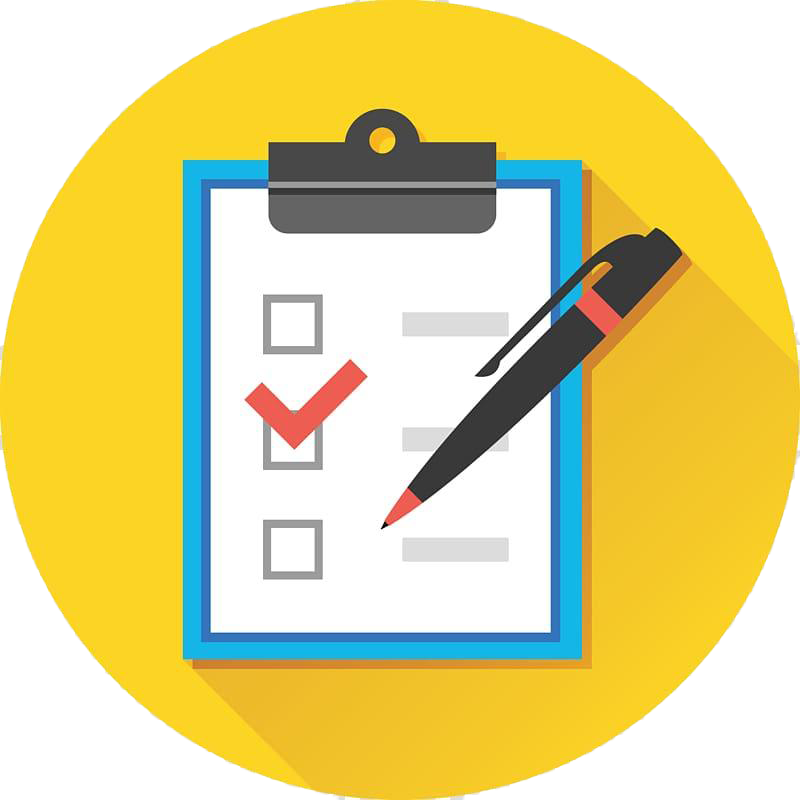

The image is size (800, 800)


In [41]:
from PIL import Image
image = Image.open("Data/Picture.png") #again, .open is a method within Image that allows for the image loading. This is saved into the variable image. Back then I would have been confused by this a lot, like how is a difference between capital and small I resulting into a method and variable?
#To see the image that we have on hand, we use the display method which takes the image as the argument

display(image)
#We can also show the image size
print(f"The image is size {image.size}")
#This returns The image is size (831, 456). Remember the printf and how to return integer numbers

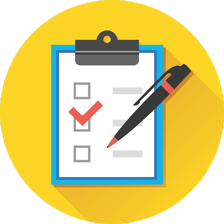

In [44]:
#We can resize the image with the .resize method. Inside, we specify the size using a different datatype. We will look it up later
image.resize((224,224))
#This makes it more square-ish


In [45]:
#Also convert it into an array of pixels
data_image = np.array(image)
print(data_image)
#When printed, it comes out as an array. I was struggling to understand how to extract the size not knowing that there is a method already for that


[[[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 ...

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]

 [[255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]
  ...
  [255 255 255   0]
  [255 255 255   0]
  [255 255 255   0]]]


In [46]:
print(f"the image in the array has shape{data_image.shape}")
#When run, returns 456, 831, 4. 456 rows (i.e if we counted the spaces between those horizontal lines), 831 columns (i.e. if we counted the spaces between the vertical lines)  and 4 layers going deep into the screen

#Tried with a different one, still returns a four dimensional image. We will work with just that

the image in the array has shape(800, 800, 4)


In [52]:
#We can also manipulate the colors
data_nored = image.copy() #We are creating an identical matrix
data_nored[] = 0 #I have not quite grasped how this filter works but lets try
plt.imshow(data_nored)

#This is worth revisiting

TypeError: 'Image' object does not support item assignment